# Breast cancer dataset

<img src="https://github.com/srimani-programmer/Breast-Cancer-Predictor/blob/master/Logo/Breast_cancer_Prediction_logo.png?raw=true">

In [3]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import (GridSearchCV, StratifiedKFold,train_test_split)
from sklearn.metrics import (accuracy_score, classification_report,
confusion_matrix, mean_absolute_error,roc_auc_score)
from sklearn.ensemble import (AdaBoostClassifier, RandomForestClassifier,RandomForestRegressor)
import re,random,sys,json,time,os,warnings,pickle,datetime,subprocess,requests,math
import pyforest,klib,missingno as msno
import numpy as np, pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
from typing import List, Dict, Tuple, Any

warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set(style='whitegrid', color_codes=True, font_scale=1.5,
        palette='plasma', font='Arial', rc={'figure.figsize': (10, 8)})
#pd.options.plotting.backend = 'plotly'

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


Attribute Information:
- ID number 2) Diagnosis (M = malignant, B = benign) 3–32)
- Ten real-valued features are computed for each cell nucleus:
- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter² / area — 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension (“coastline approximation” — 1)

In [4]:
df=pd.read_csv('./Breast Cancer Data.csv')
df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80    1001.00   
1      842517         M        20.57         17.77          132.90    1326.00   
2    84300903         M        19.69         21.25          130.00    1203.00   
3    84348301         M        11.42         20.38           77.58     386.10   
4    84358402         M        20.29         14.34          135.10    1297.00   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00    1479.00   
565    926682         M        20.13         28.25          131.20    1261.00   
566    926954         M        16.60         28.08          108.30     858.10   
567    927241         M        20.60         29.33          140.10    1265.00   
568     92751         B         7.76         24.54           47.92     181.00   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0               0.12              0.28            0.30                 0.15   
1               0.08              0.08            0.09                 0.07   
2               0.11              0.16            0.20                 0.13   
3               0.14              0.28            0.24                 0.11   
4               0.10              0.13            0.20                 0.10   
..               ...               ...             ...                  ...   
564             0.11              0.12            0.24                 0.14   
565             0.10              0.10            0.14                 0.10   
566             0.08              0.10            0.09                 0.05   
567             0.12              0.28            0.35                 0.15   
568             0.05              0.04            0.00                 0.00   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
0             0.24                    0.08       1.09        0.91   
1             0.18                    0.06       0.54        0.73   
2             0.21                    0.06       0.75        0.79   
3             0.26                    0.10       0.50        1.16   
4             0.18                    0.06       0.76        0.78   
..             ...                     ...        ...         ...   
564           0.17                    0.06       1.18        1.26   
565           0.18                    0.06       0.77        2.46   
566           0.16                    0.06       0.46        1.07   
567           0.24                    0.07       0.73        1.59   
568           0.16                    0.06       0.39        1.43   

     perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  \
0            8.59   153.40           0.01            0.05          0.05   
1            3.40    74.08           0.01            0.01          0.02   
2            4.58    94.03           0.01            0.04          0.04   
3            3.44    27.23           0.01            0.07          0.06   
4            5.44    94.44           0.01            0.02          0.06   
..            ...      ...            ...             ...           ...   
564          7.67   158.70           0.01            0.03          0.05   
565          5.20    99.04           0.01            0.02          0.04   
566          3.42    48.55           0.01            0.04          0.05   
567          5.77    86.22           0.01            0.06          0.07   
568          2.55    19.15           0.01            0.00          0.00   

     concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
0                 0.02         0.03                  0.01         25.38   
1                 0.01         0.01                  0.00         24.99   
2                 0.02         0.02                  0.00         23.57   
3                 0.02         0.06                  0.01  

<AxesSubplot:>

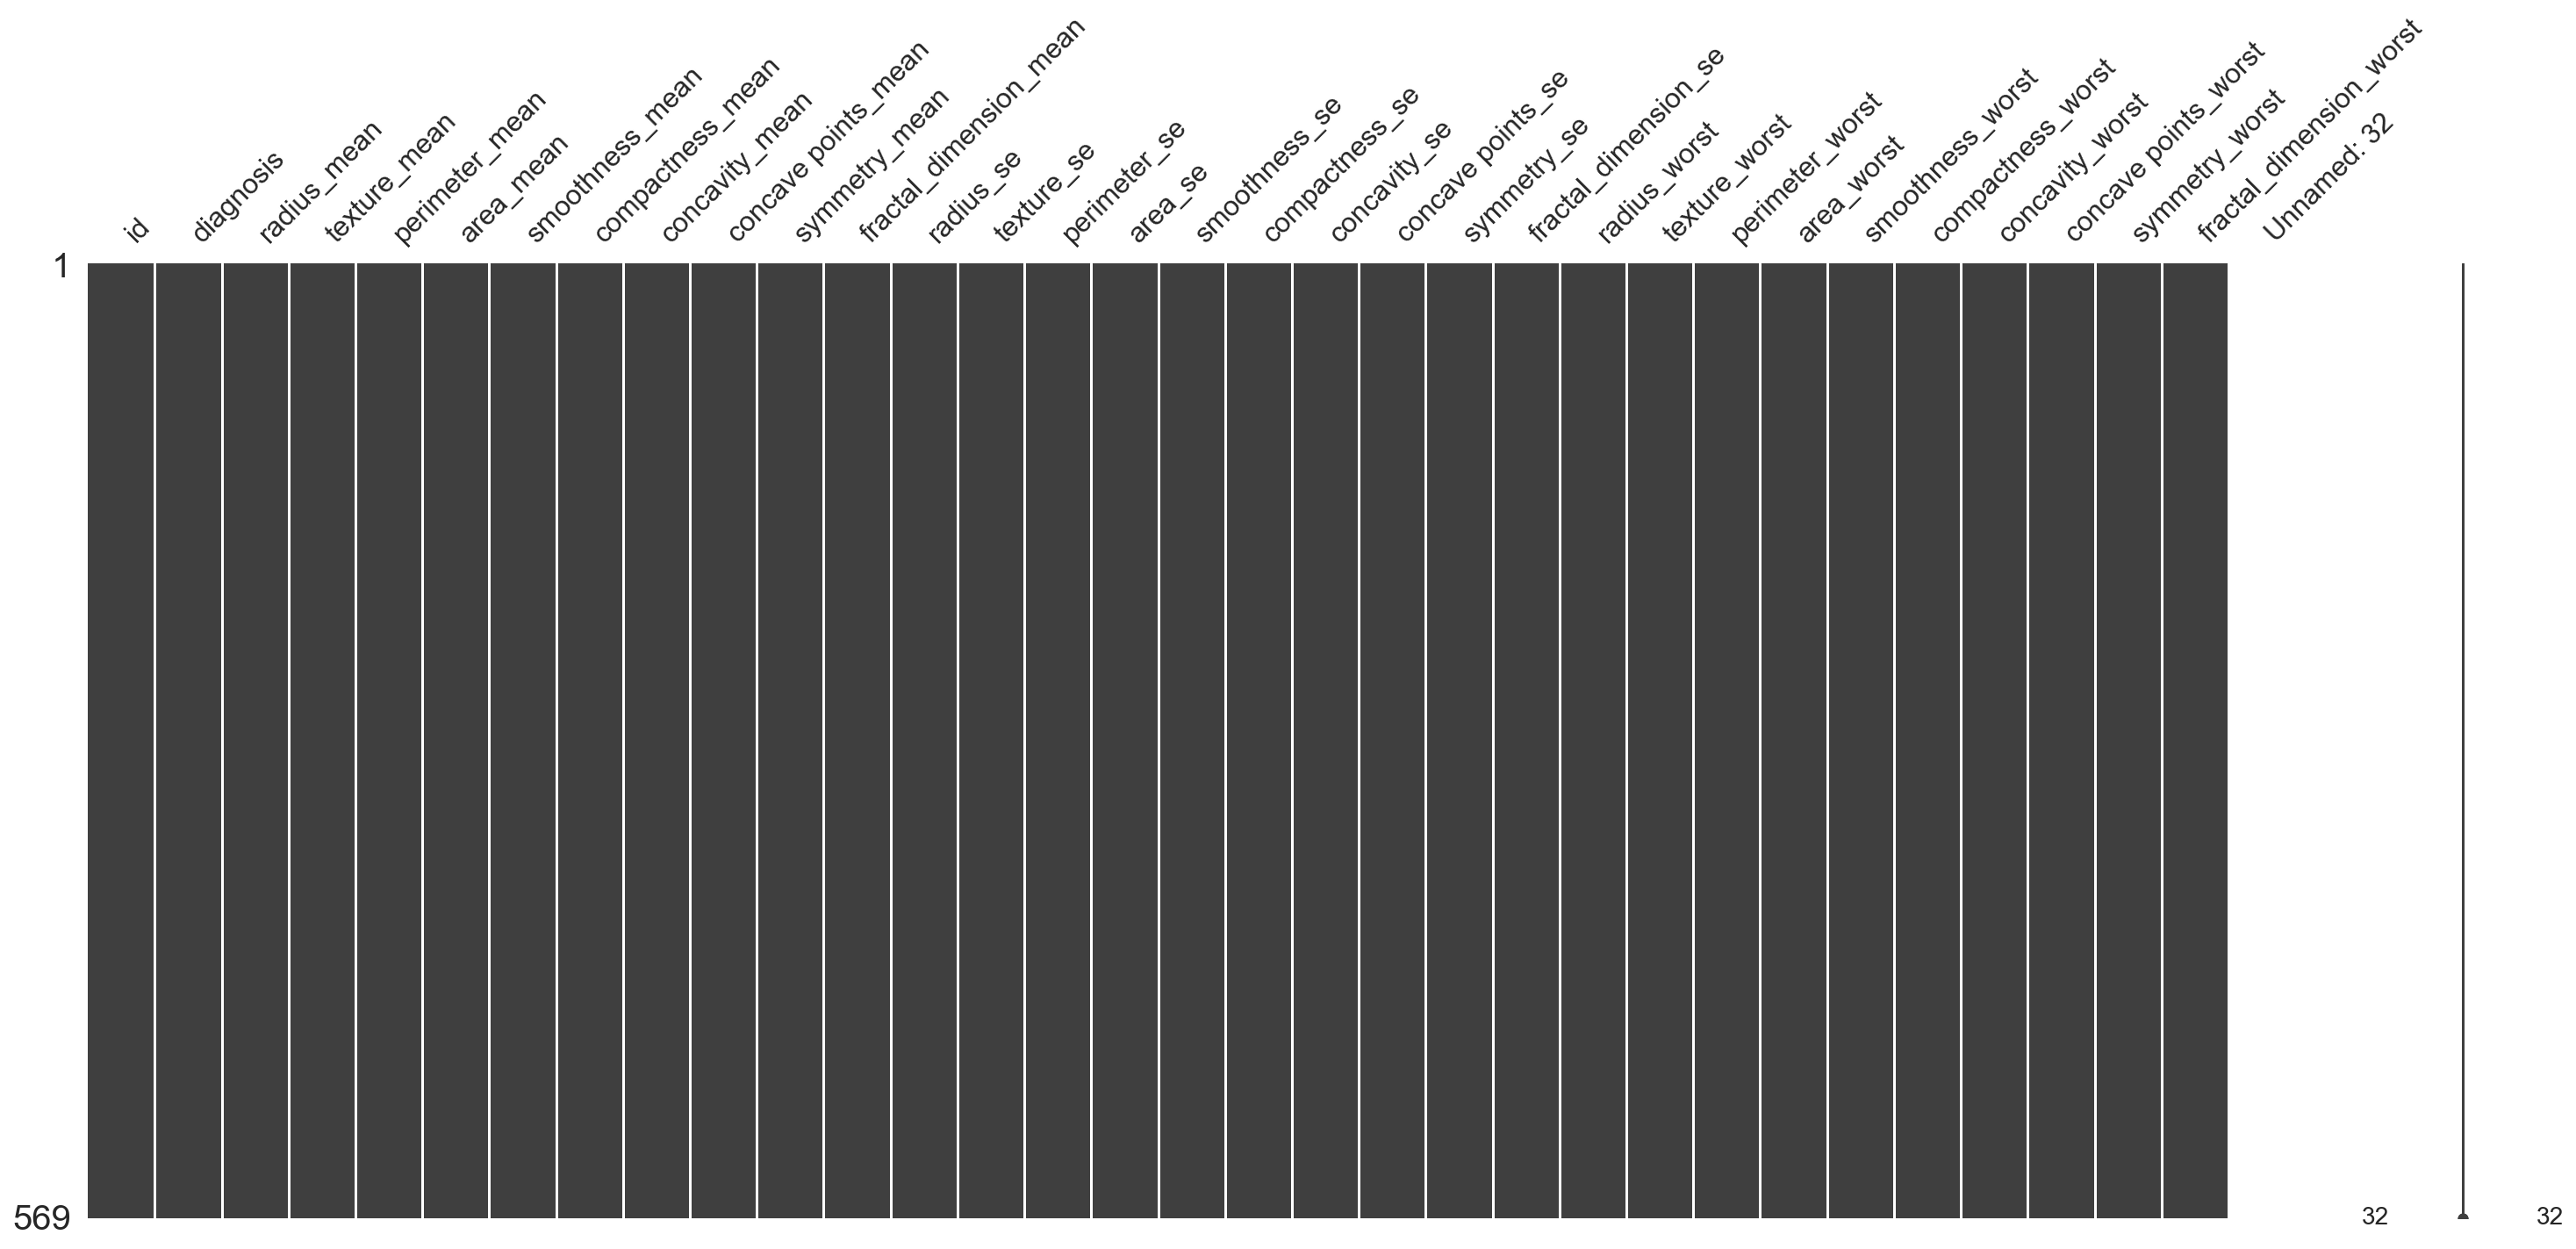

In [5]:
msno.matrix(df)

In [6]:
print("Shape of the dataframe:",df.shape)

Shape of the dataframe: (569, 33)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [10]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [11]:
df.describe().T

count        mean          std     min       25%  \
id                      569.00 30371831.43 125020585.61 8670.00 869218.00   
radius_mean             569.00       14.13         3.52    6.98     11.70   
texture_mean            569.00       19.29         4.30    9.71     16.17   
perimeter_mean          569.00       91.97        24.30   43.79     75.17   
area_mean               569.00      654.89       351.91  143.50    420.30   
smoothness_mean         569.00        0.10         0.01    0.05      0.09   
compactness_mean        569.00        0.10         0.05    0.02      0.06   
concavity_mean          569.00        0.09         0.08    0.00      0.03   
concave points_mean     569.00        0.05         0.04    0.00      0.02   
symmetry_mean           569.00        0.18         0.03    0.11      0.16   
fractal_dimension_mean  569.00        0.06         0.01    0.05      0.06   
radius_se               569.00        0.41         0.28    0.11      0.23   
texture_se              569.00        1.22         0.55    0.36      0.83   
perimeter_se            569.00        2.87         2.02    0.76      1.61   
area_se                 569.00       40.34        45.49    6.80     17.85   
smoothness_se           569.00        0.01         0.00    0.00      0.01   
compactness_se          569.00        0.03         0.02    0.00      0.01   
concavity_se            569.00        0.03         0.03    0.00      0.02   
concave points_se       569.00        0.01         0.01    0.00      0.01   
symmetry_se             569.00        0.02         0.01    0.01      0.02   
fractal_dimension_se    569.00        0.00         0.00    0.00      0.00   
radius_worst            569.00       16.27         4.83    7.93     13.01   
texture_worst           569.00       25.68         6.15   12.02     21.08   
perimeter_worst         569.00      107.26        33.60   50.41     84.11   
area_worst              569.00      880.58       569.36  185.20    515.30   
smoothness_worst        569.00        0.13         0.02    0.07      0.12   
compactness_worst       569.00        0.25         0.16    0.03      0.15   
concavity_worst         569.00        0.27         0.21    0.00      0.11   
concave points_worst    569.00        0.11         0.07    0.00      0.06   
symmetry_worst          569.00        0.29         0.06    0.16      0.25   
fractal_dimension_worst 569.00        0.08         0.02    0.06      0.07   
Unnamed: 32               0.00         NaN          NaN     NaN       NaN   

                              50%        75%          max  
id                      906024.00 8813129.00 911320502.00  
radius_mean                 13.37      15.78        28.11  
texture_mean                18.84      21.80        39.28  
perimeter_mean              86.24     104.10       188.50  
area_mean                  551.10     782.70      2501.00  
smoothness_mean              0.10       0.11         0.16  
compactness_mean             0.09       0.13         0.35  
concavity_mean               0.06       0.13         0.43  
concave points_mean          0.03       0.07         0.20  
symmetry_mean                0.18       0.20         0.30  
fractal_dimension_mean       0.06       0.07         0.10  
radius_se                    0.32       0.48         2.87  
texture_se                   1.11       1.47         4.88  
perimeter_se                 2.29       3.36        21.98  
area_se                     24.53      45.19       542.20  
smoothness_se                0.01       0.01         0.03  
compactness_se               0.02       0.03         0.14  
concavity_se                 0.03       0.04         0.40  
concave points_se            0.01       0.01         0.05  
symmetry_se                  0.02       0.02         0.08  
fractal_dimension_se         0.00       0.00         0.03  
radius_worst                14.97      18.79        36.04  
texture_worst               25.41      29.72        49.54  
perimeter_worst             97.66     125.4

Displaying positive correlations. Specify a positive "threshold" to limit the results further.


<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

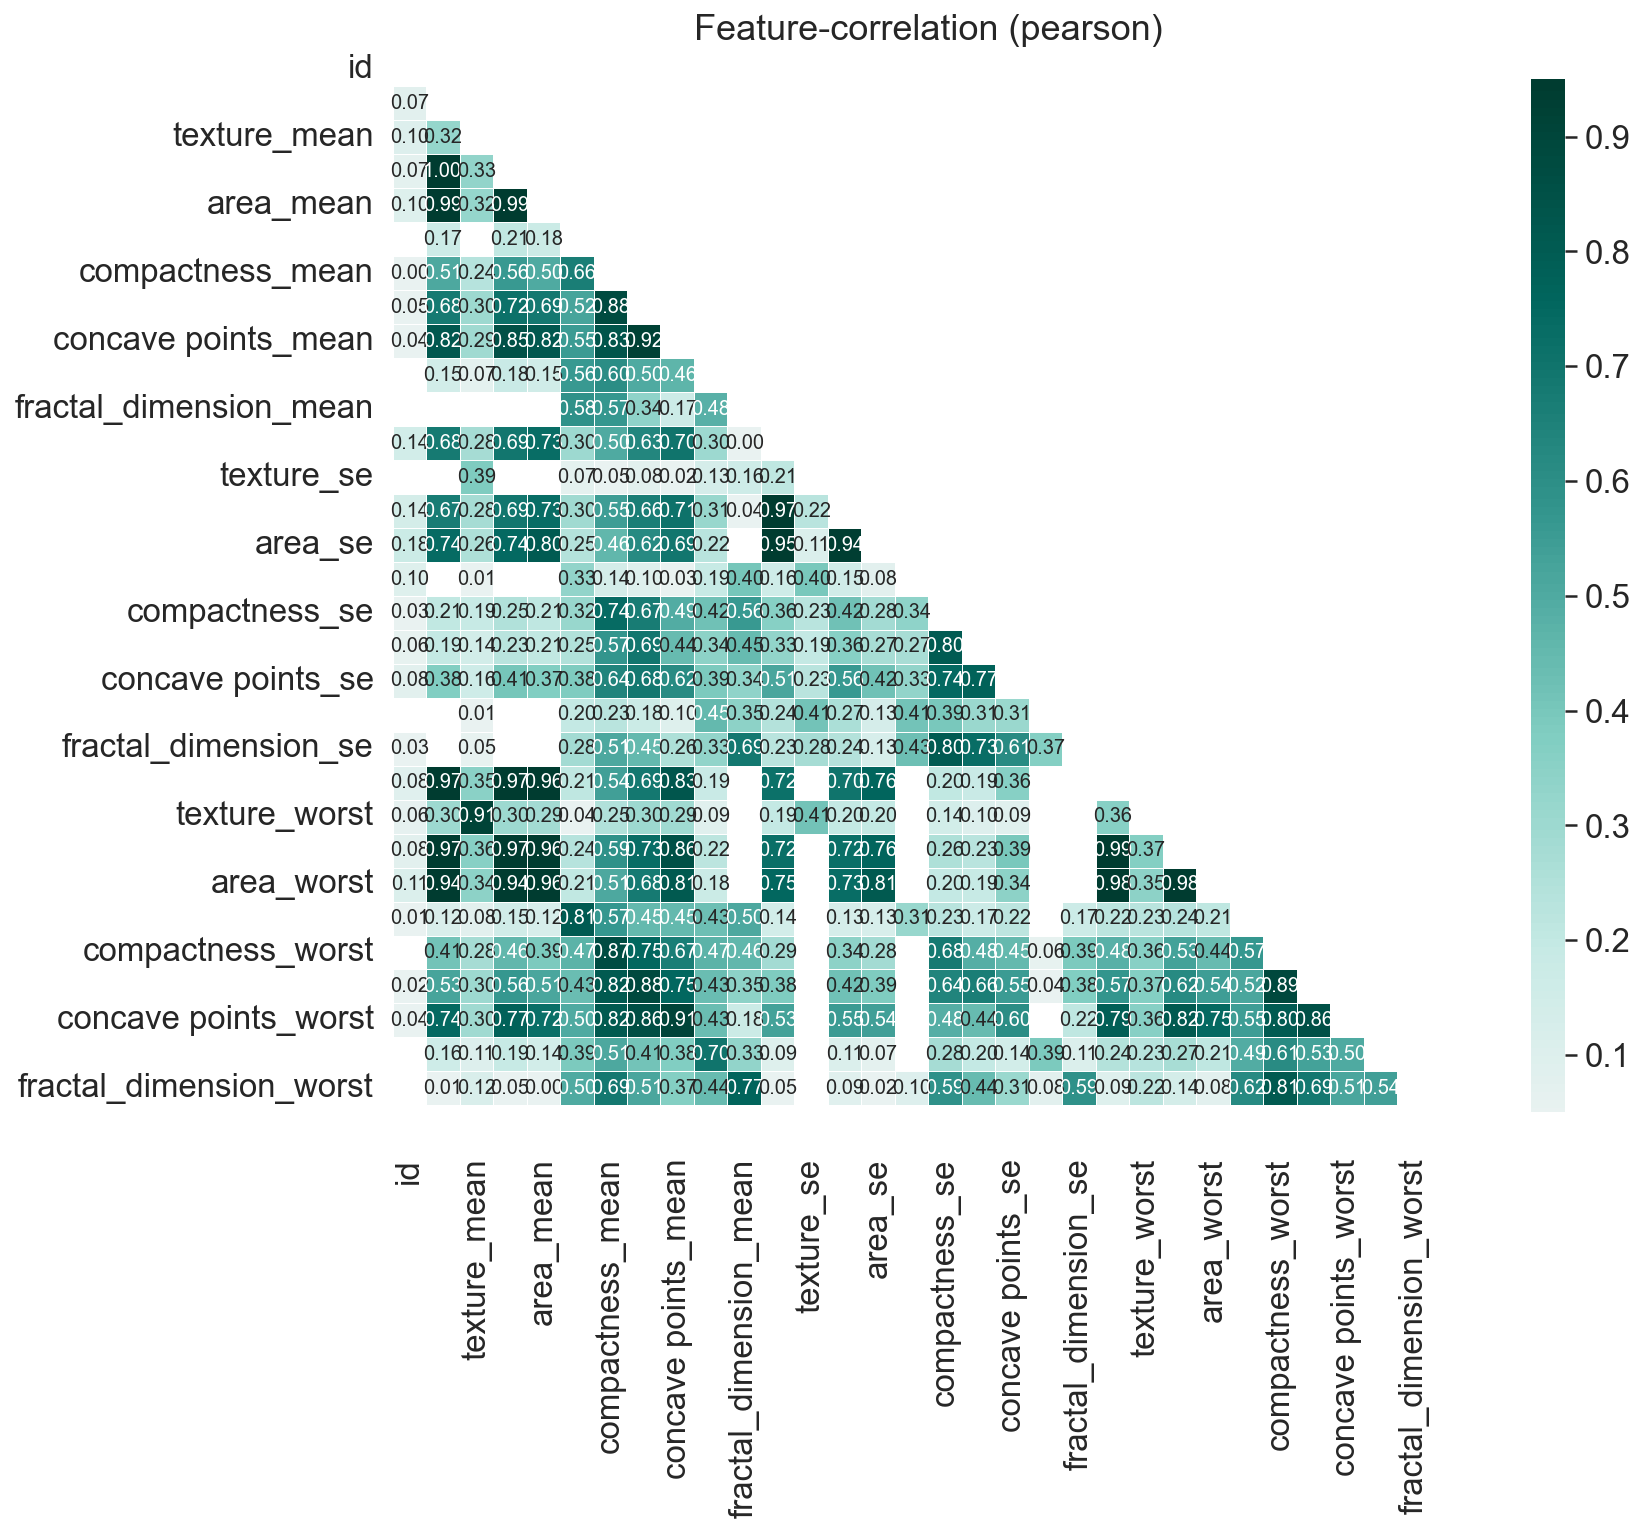

In [12]:
klib.corr_plot(df, split='pos') 

Displaying negative correlations. Specify a negative "threshold" to limit the results further.


<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

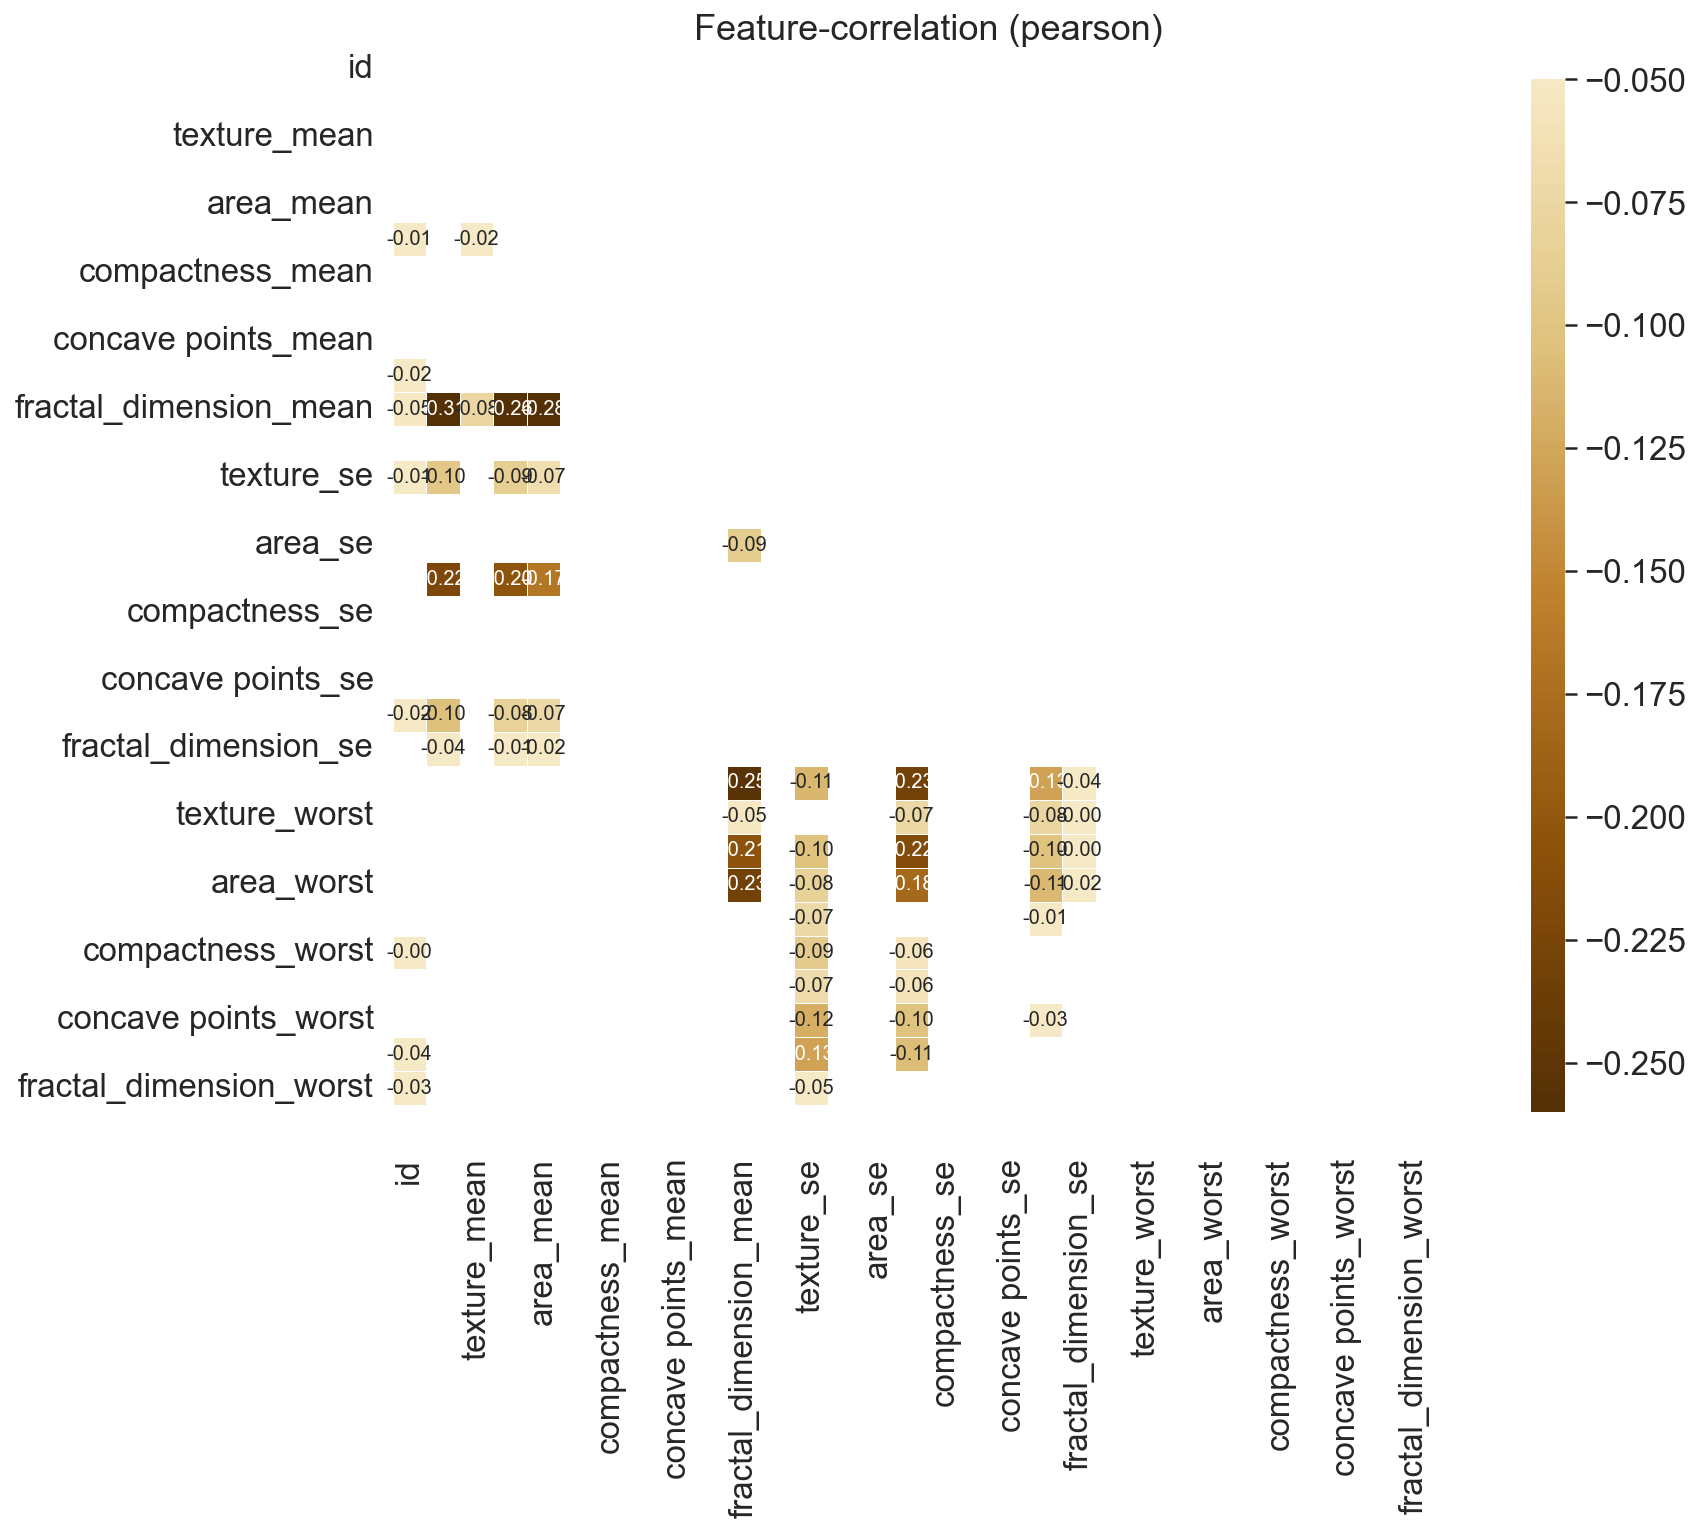

In [13]:
klib.corr_plot(df, split='neg') 

In [14]:
df.drop(['Unnamed: 32'],axis=1,inplace=True)

In [15]:
df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80    1001.00   
1      842517         M        20.57         17.77          132.90    1326.00   
2    84300903         M        19.69         21.25          130.00    1203.00   
3    84348301         M        11.42         20.38           77.58     386.10   
4    84358402         M        20.29         14.34          135.10    1297.00   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00    1479.00   
565    926682         M        20.13         28.25          131.20    1261.00   
566    926954         M        16.60         28.08          108.30     858.10   
567    927241         M        20.60         29.33          140.10    1265.00   
568     92751         B         7.76         24.54           47.92     181.00   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0               0.12              0.28            0.30                 0.15   
1               0.08              0.08            0.09                 0.07   
2               0.11              0.16            0.20                 0.13   
3               0.14              0.28            0.24                 0.11   
4               0.10              0.13            0.20                 0.10   
..               ...               ...             ...                  ...   
564             0.11              0.12            0.24                 0.14   
565             0.10              0.10            0.14                 0.10   
566             0.08              0.10            0.09                 0.05   
567             0.12              0.28            0.35                 0.15   
568             0.05              0.04            0.00                 0.00   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
0             0.24                    0.08       1.09        0.91   
1             0.18                    0.06       0.54        0.73   
2             0.21                    0.06       0.75        0.79   
3             0.26                    0.10       0.50        1.16   
4             0.18                    0.06       0.76        0.78   
..             ...                     ...        ...         ...   
564           0.17                    0.06       1.18        1.26   
565           0.18                    0.06       0.77        2.46   
566           0.16                    0.06       0.46        1.07   
567           0.24                    0.07       0.73        1.59   
568           0.16                    0.06       0.39        1.43   

     perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  \
0            8.59   153.40           0.01            0.05          0.05   
1            3.40    74.08           0.01            0.01          0.02   
2            4.58    94.03           0.01            0.04          0.04   
3            3.44    27.23           0.01            0.07          0.06   
4            5.44    94.44           0.01            0.02          0.06   
..            ...      ...            ...             ...           ...   
564          7.67   158.70           0.01            0.03          0.05   
565          5.20    99.04           0.01            0.02          0.04   
566          3.42    48.55           0.01            0.04          0.05   
567          5.77    86.22           0.01            0.06          0.07   
568          2.55    19.15           0.01            0.00          0.00   

     concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
0                 0.02         0.03                  0.01         25.38   
1                 0.01         0.01                  0.00         24.99   
2                 0.02         0.02                  0.00         23.57   
3                 0.02         0.06                  0.01  

In [16]:
ProfileReport(df,title='Breast Cancer Data',minimal=True)

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.00it/s]


In [17]:
df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80    1001.00   
1      842517         M        20.57         17.77          132.90    1326.00   
2    84300903         M        19.69         21.25          130.00    1203.00   
3    84348301         M        11.42         20.38           77.58     386.10   
4    84358402         M        20.29         14.34          135.10    1297.00   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00    1479.00   
565    926682         M        20.13         28.25          131.20    1261.00   
566    926954         M        16.60         28.08          108.30     858.10   
567    927241         M        20.60         29.33          140.10    1265.00   
568     92751         B         7.76         24.54           47.92     181.00   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0               0.12              0.28            0.30                 0.15   
1               0.08              0.08            0.09                 0.07   
2               0.11              0.16            0.20                 0.13   
3               0.14              0.28            0.24                 0.11   
4               0.10              0.13            0.20                 0.10   
..               ...               ...             ...                  ...   
564             0.11              0.12            0.24                 0.14   
565             0.10              0.10            0.14                 0.10   
566             0.08              0.10            0.09                 0.05   
567             0.12              0.28            0.35                 0.15   
568             0.05              0.04            0.00                 0.00   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
0             0.24                    0.08       1.09        0.91   
1             0.18                    0.06       0.54        0.73   
2             0.21                    0.06       0.75        0.79   
3             0.26                    0.10       0.50        1.16   
4             0.18                    0.06       0.76        0.78   
..             ...                     ...        ...         ...   
564           0.17                    0.06       1.18        1.26   
565           0.18                    0.06       0.77        2.46   
566           0.16                    0.06       0.46        1.07   
567           0.24                    0.07       0.73        1.59   
568           0.16                    0.06       0.39        1.43   

     perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  \
0            8.59   153.40           0.01            0.05          0.05   
1            3.40    74.08           0.01            0.01          0.02   
2            4.58    94.03           0.01            0.04          0.04   
3            3.44    27.23           0.01            0.07          0.06   
4            5.44    94.44           0.01            0.02          0.06   
..            ...      ...            ...             ...           ...   
564          7.67   158.70           0.01            0.03          0.05   
565          5.20    99.04           0.01            0.02          0.04   
566          3.42    48.55           0.01            0.04          0.05   
567          5.77    86.22           0.01            0.06          0.07   
568          2.55    19.15           0.01            0.00          0.00   

     concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
0                 0.02         0.03                  0.01         25.38   
1                 0.01         0.01                  0.00         24.99   
2                 0.02         0.02                  0.00         23.57   
3                 0.02         0.06                  0.01  

In [18]:
## M : 1 and B : 0 

df.diagnosis =  df.diagnosis.apply(lambda x: 1 if x=='M' else 0)

In [19]:
df

id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
0      842302          1        17.99         10.38          122.80   
1      842517          1        20.57         17.77          132.90   
2    84300903          1        19.69         21.25          130.00   
3    84348301          1        11.42         20.38           77.58   
4    84358402          1        20.29         14.34          135.10   
..        ...        ...          ...           ...             ...   
564    926424          1        21.56         22.39          142.00   
565    926682          1        20.13         28.25          131.20   
566    926954          1        16.60         28.08          108.30   
567    927241          1        20.60         29.33          140.10   
568     92751          0         7.76         24.54           47.92   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0      1001.00             0.12              0.28            0.30   
1      1326.00             0.08              0.08            0.09   
2      1203.00             0.11              0.16            0.20   
3       386.10             0.14              0.28            0.24   
4      1297.00             0.10              0.13            0.20   
..         ...              ...               ...             ...   
564    1479.00             0.11              0.12            0.24   
565    1261.00             0.10              0.10            0.14   
566     858.10             0.08              0.10            0.09   
567    1265.00             0.12              0.28            0.35   
568     181.00             0.05              0.04            0.00   

     concave points_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
0                   0.15           0.24                    0.08       1.09   
1                   0.07           0.18                    0.06       0.54   
2                   0.13           0.21                    0.06       0.75   
3                   0.11           0.26                    0.10       0.50   
4                   0.10           0.18                    0.06       0.76   
..                   ...            ...                     ...        ...   
564                 0.14           0.17                    0.06       1.18   
565                 0.10           0.18                    0.06       0.77   
566                 0.05           0.16                    0.06       0.46   
567                 0.15           0.24                    0.07       0.73   
568                 0.00           0.16                    0.06       0.39   

     texture_se  perimeter_se  area_se  smoothness_se  compactness_se  \
0          0.91          8.59   153.40           0.01            0.05   
1          0.73          3.40    74.08           0.01            0.01   
2          0.79          4.58    94.03           0.01            0.04   
3          1.16          3.44    27.23           0.01            0.07   
4          0.78          5.44    94.44           0.01            0.02   
..          ...           ...      ...            ...             ...   
564        1.26          7.67   158.70           0.01            0.03   
565        2.46          5.20    99.04           0.01            0.02   
566        1.07          3.42    48.55           0.01            0.04   
567        1.59          5.77    86.22           0.01            0.06   
568        1.43          2.55    19.15           0.01            0.00   

     concavity_se  concave points_se  symmetry_se  fractal_dimension_se  \
0            0.05               0.02         0.03                  0.01   
1            0.02               0.01         0.01                  0.00   
2            0.04               0.02         0.02                  0.00   
3            0.06               0.02         0.06                  0.01   
4            0.06               0.02         0.02                  0.01   
..            ...                ...          ...                

<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

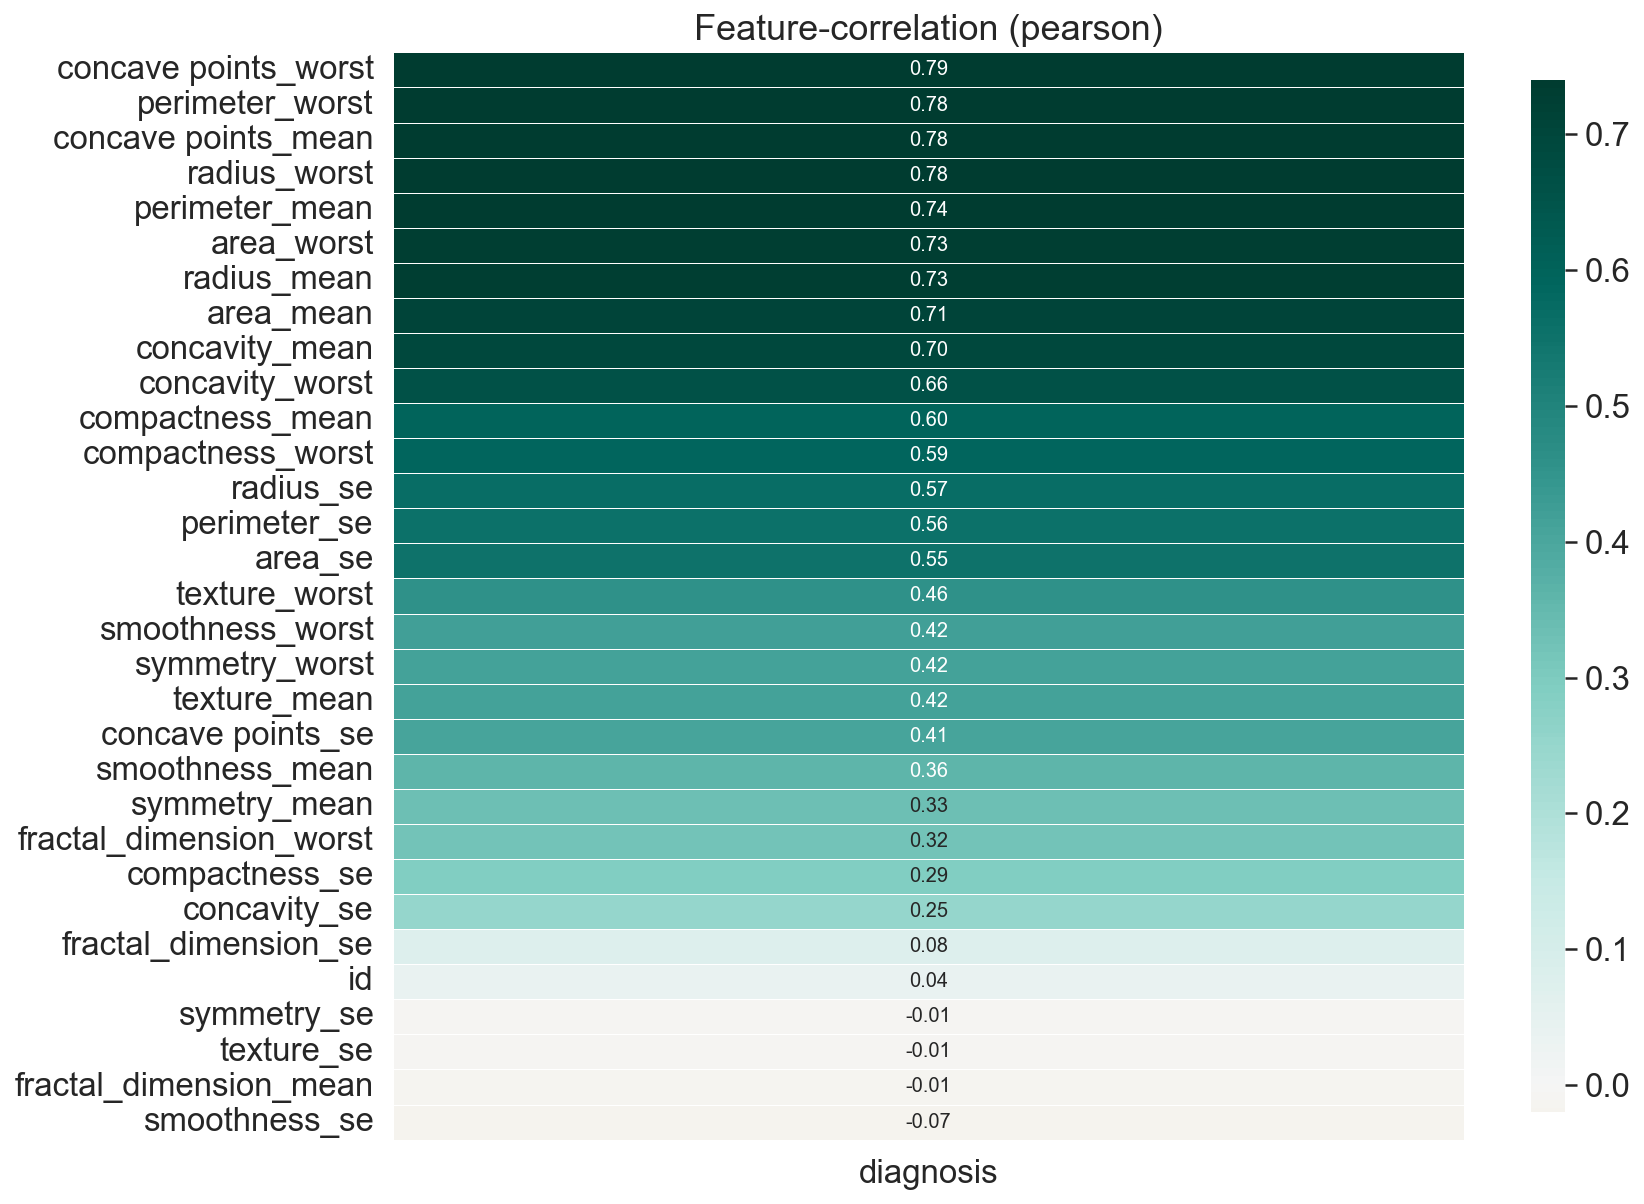

In [20]:
klib.corr_plot(df,target='diagnosis')

In [21]:
df.head()

id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302          1        17.99         10.38          122.80    1001.00   
1    842517          1        20.57         17.77          132.90    1326.00   
2  84300903          1        19.69         21.25          130.00    1203.00   
3  84348301          1        11.42         20.38           77.58     386.10   
4  84358402          1        20.29         14.34          135.10    1297.00   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0             0.12              0.28            0.30                 0.15   
1             0.08              0.08            0.09                 0.07   
2             0.11              0.16            0.20                 0.13   
3             0.14              0.28            0.24                 0.11   
4             0.10              0.13            0.20                 0.10   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  \
0           0.24                    0.08       1.09        0.91          8.59   
1           0.18                    0.06       0.54        0.73          3.40   
2           0.21                    0.06       0.75        0.79          4.58   
3           0.26                    0.10       0.50        1.16          3.44   
4           0.18                    0.06       0.76        0.78          5.44   

   area_se  smoothness_se  compactness_se  concavity_se  concave points_se  \
0   153.40           0.01            0.05          0.05               0.02   
1    74.08           0.01            0.01          0.02               0.01   
2    94.03           0.01            0.04          0.04               0.02   
3    27.23           0.01            0.07          0.06               0.02   
4    94.44           0.01            0.02          0.06               0.02   

   symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0         0.03                  0.01         25.38          17.33   
1         0.01                  0.00         24.99          23.41   
2         0.02                  0.00         23.57          25.53   
3         0.06                  0.01         14.91          26.50   
4         0.02                  0.01         22.54          16.67   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           184.60     2019.00              0.16               0.67   
1           158.80     1956.00              0.12               0.19   
2           152.50     1709.00              0.14               0.42   
3            98.87      567.70              0.21               0.87   
4           152.20     1575.00              0.14               0.20   

   concavity_worst  concave points_worst  symmetry_worst  \
0             0.71                  0.27            0.46   
1             0.24                  0.19            0.28   
2             0.45                  0.24            0.36   
3             0.69                  0.26            0.66   
4             0.40                  0.16            0.24   

   fractal_dimension_worst  
0                     0.12  
1                     0.09  
2                     0.09  
3                     0.17  
4                     0.08

In [23]:
# keep from radius_mean to fractal_dimension_mean
i = df.columns.get_loc('radius_mean')
j = df.columns.get_loc('fractal_dimension_mean')
mean_df = df.iloc[:,i:j+1]
mean_df['diagnosis'] = df.diagnosis
mean_df

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80    1001.00             0.12   
1          20.57         17.77          132.90    1326.00             0.08   
2          19.69         21.25          130.00    1203.00             0.11   
3          11.42         20.38           77.58     386.10             0.14   
4          20.29         14.34          135.10    1297.00             0.10   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00    1479.00             0.11   
565        20.13         28.25          131.20    1261.00             0.10   
566        16.60         28.08          108.30     858.10             0.08   
567        20.60         29.33          140.10    1265.00             0.12   
568         7.76         24.54           47.92     181.00             0.05   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0                0.28            0.30                 0.15           0.24   
1                0.08            0.09                 0.07           0.18   
2                0.16            0.20                 0.13           0.21   
3                0.28            0.24                 0.11           0.26   
4                0.13            0.20                 0.10           0.18   
..                ...             ...                  ...            ...   
564              0.12            0.24                 0.14           0.17   
565              0.10            0.14                 0.10           0.18   
566              0.10            0.09                 0.05           0.16   
567              0.28            0.35                 0.15           0.24   
568              0.04            0.00                 0.00           0.16   

     fractal_dimension_mean  diagnosis  
0                      0.08          1  
1                      0.06          1  
2                      0.06          1  
3                      0.10          1  
4                      0.06          1  
..                      ...        ...  
564                    0.06          1  
565                    0.06          1  
566                    0.06          1  
567                    0.07          1  
568                    0.06          0  

[569 rows x 11 columns]

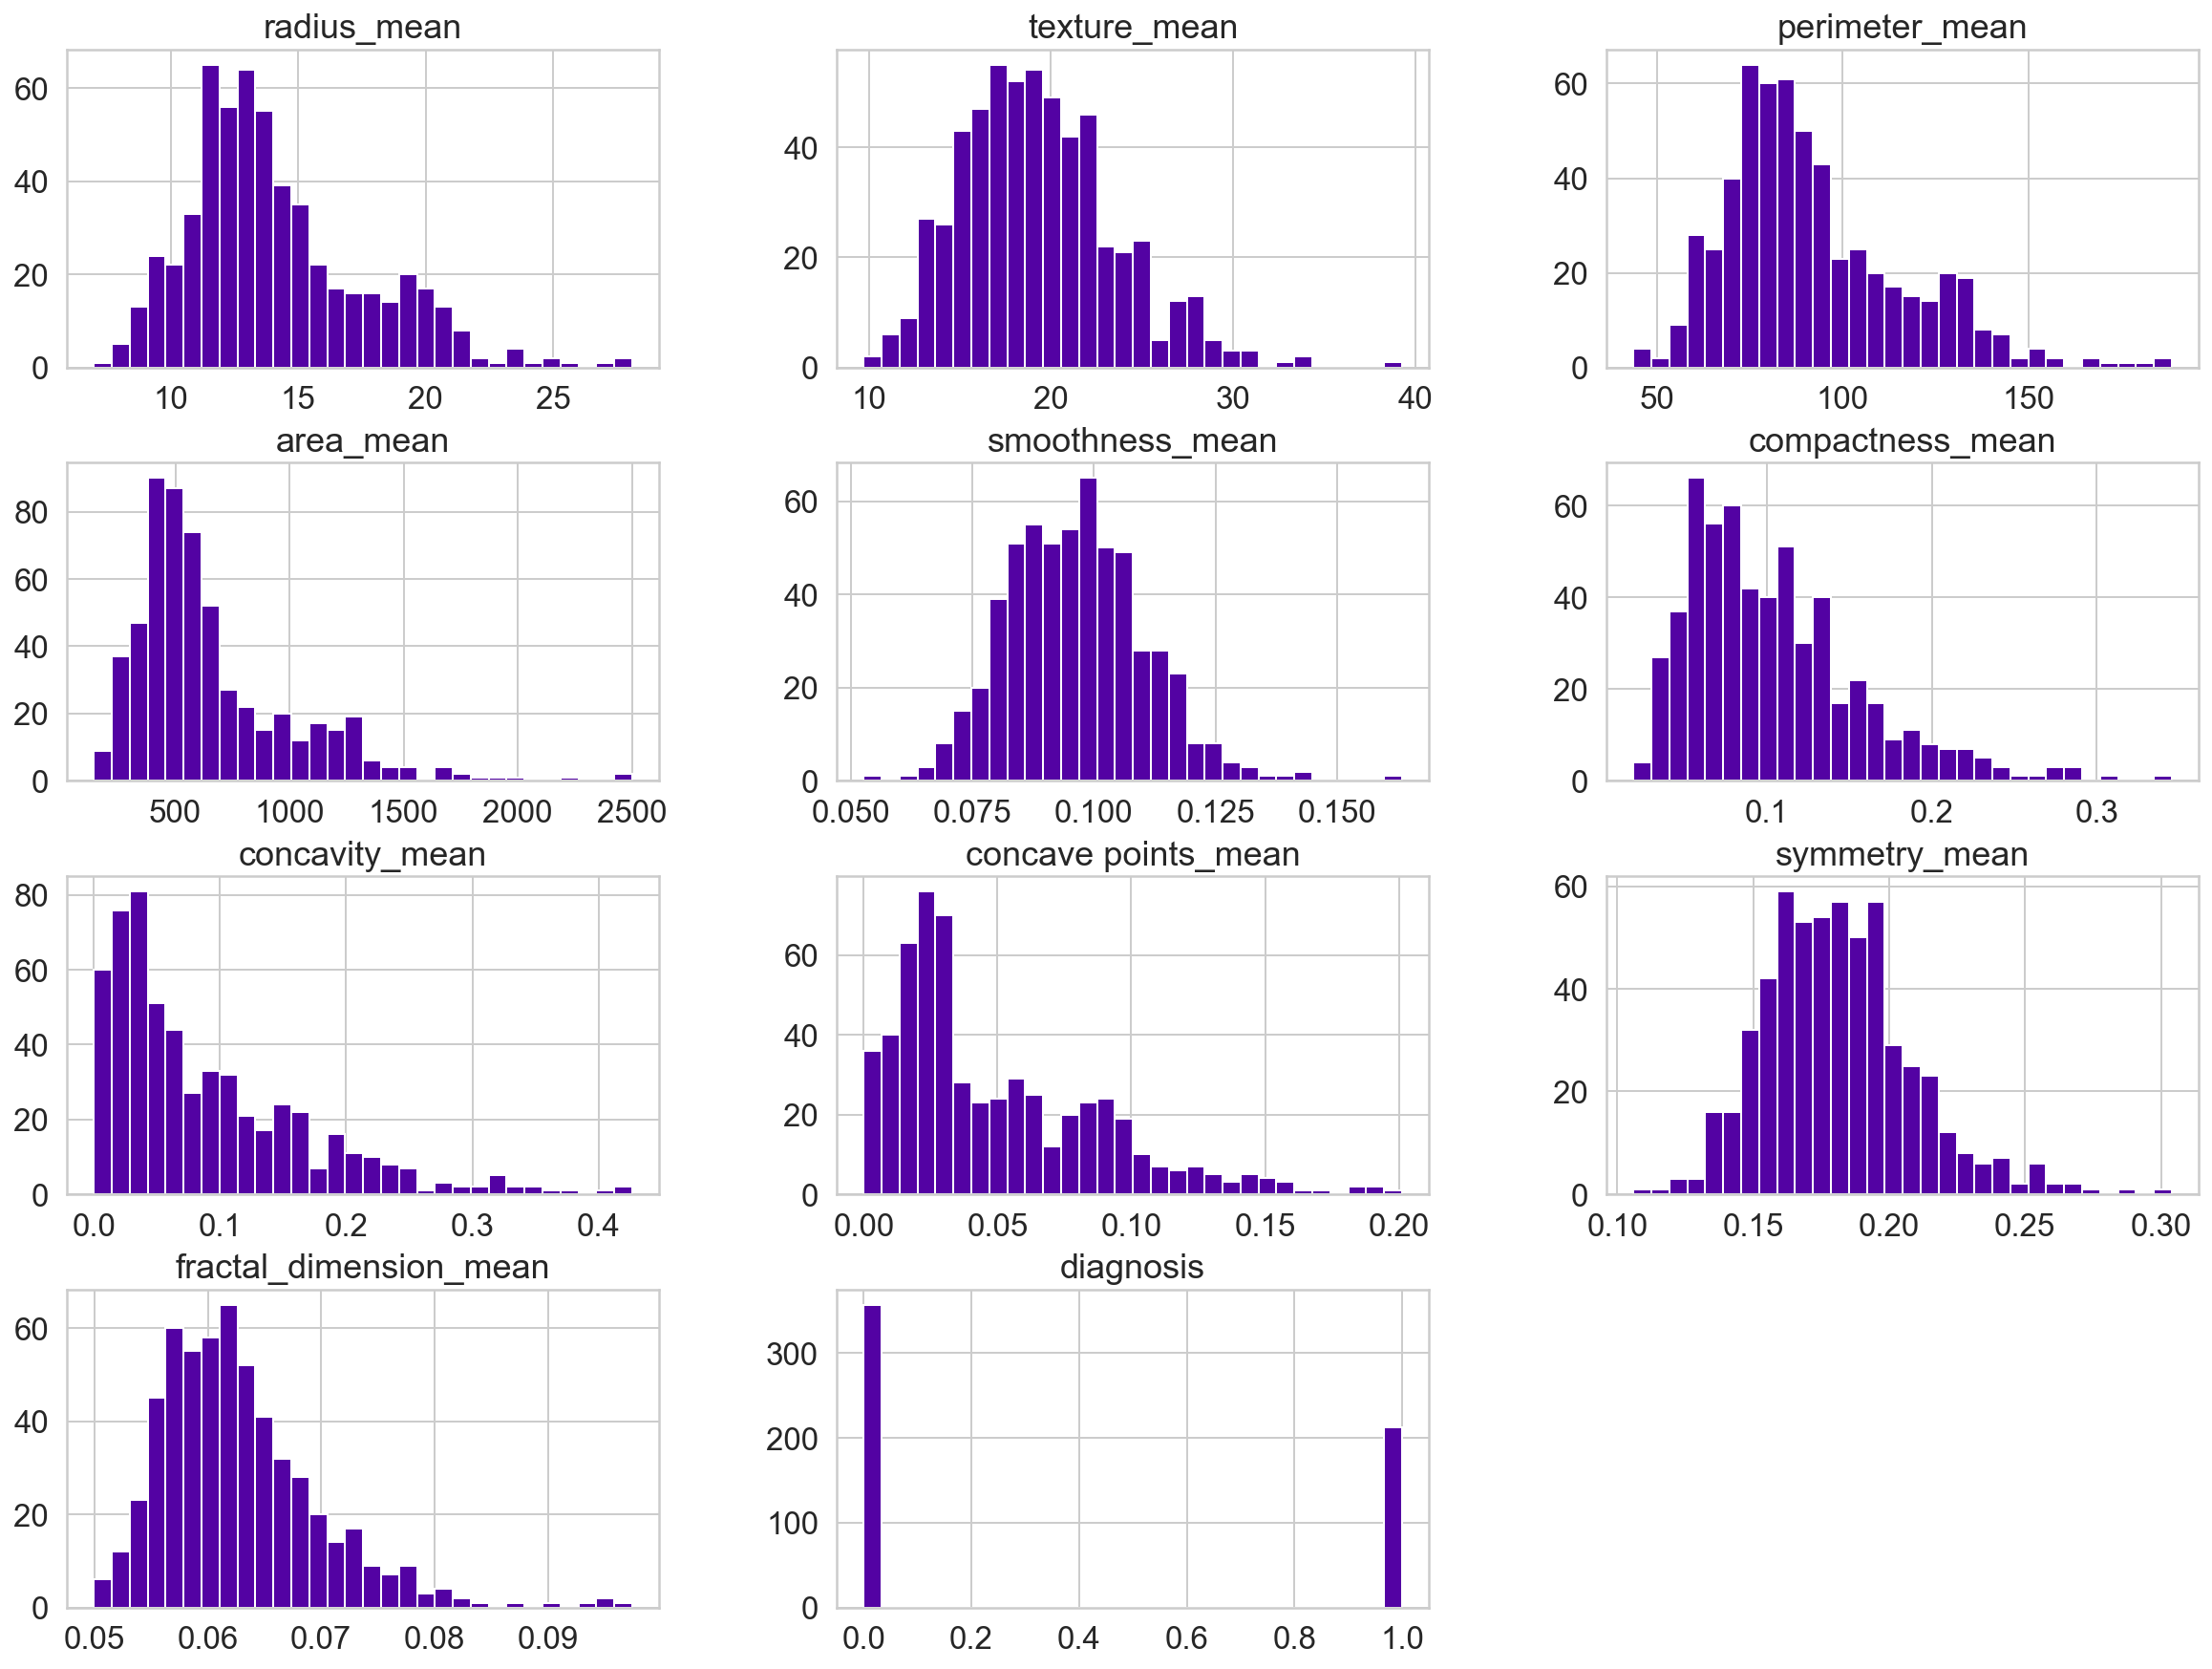

In [24]:
mean_df.hist(bins=30,figsize=(20,15));



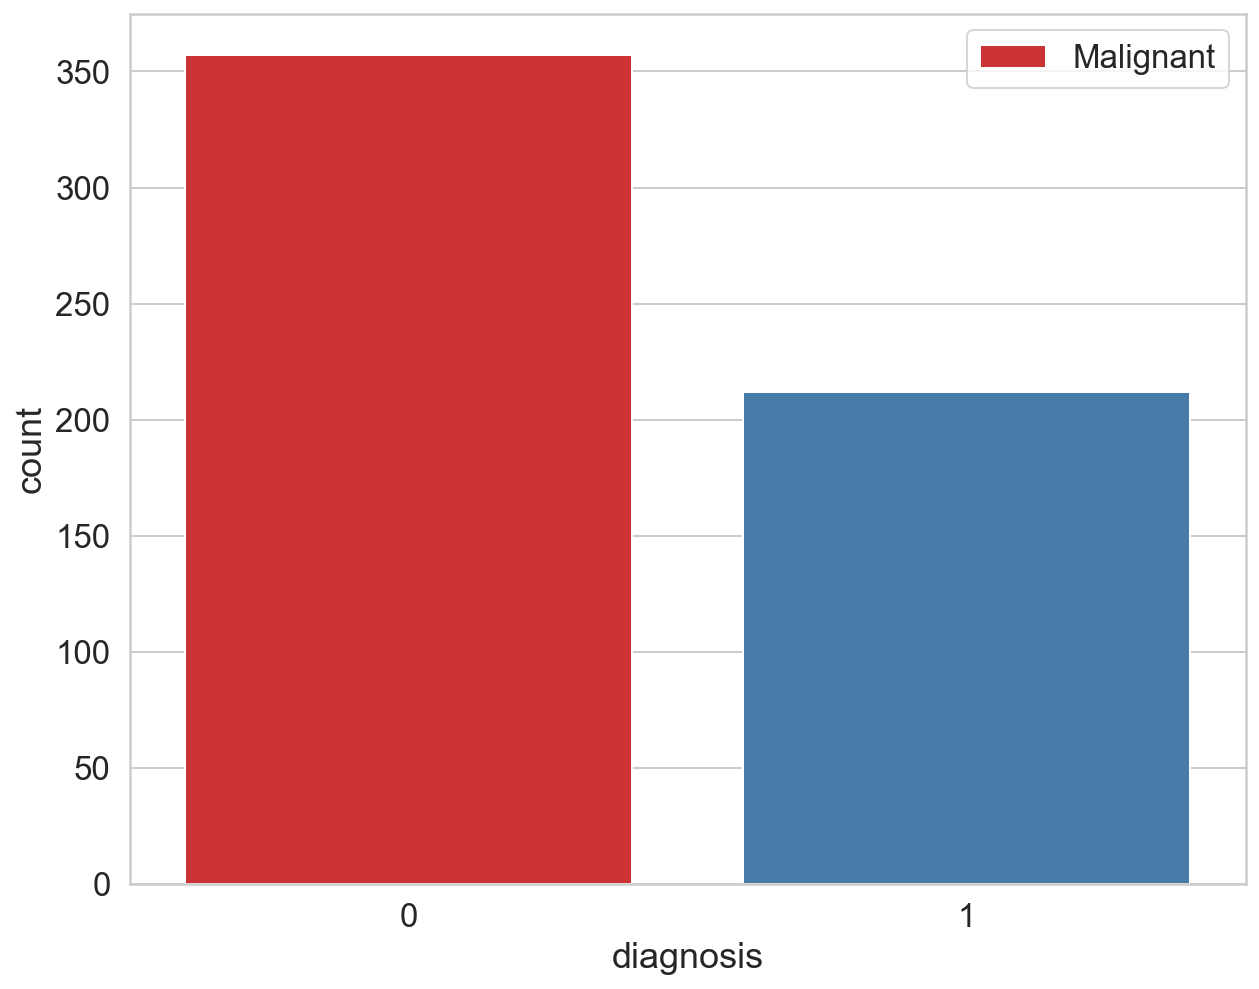

In [25]:
sns.countplot(x='diagnosis',data=mean_df,palette='Set1')
plt.legend(['Malignant','Benign'],loc='best')
plt.show();

In [26]:
df_mean = df[df.columns[:11]]
df_se = df.drop(df.columns[1:11], axis=1)
df_se = df_se.drop(df_se.columns[11:], axis=1)
df_worst = df.drop(df.columns[1:21], axis=1)

## Things to remember while working with this dataset:
- Slightly Imbalanced dataset (357 malignant cases and 212 benign cases). - We have to select an adequate re-sampling algorithm for balancing.
- Multicollinearity between some features.
- As three columns essentially contain the same information, which is the physical size of the cell, we have to choose an appropriate feature selection method to eliminate unnecessary features.